## Homework 6 : Clustering

#### Due Date: Friday May 6, 2021 at 11:59PM ET

We want to learn about clustering. We will work with data from the World Bank. The World Bank is an international financial organization that provides loans to governments of developing countries. The questions guide you step-by-step through these steps of data processing. 

#### Collaboration Policy

You are prohibited from sharing your solutions. You are discouraged from providing guidance or assistance on questions. You should refrain from discussing the assignment with others. Consult the syllabus for information about policies surrounding misconduct.

**Name:** *list name here*

**NetId:** *list netid here*

**Collaborators:** *list names here*

### Rubric

Question | Points
--- | ---
Question 1.1 | 0
Question 1.2 | 1
Question 2.1 | 1
Question 2.2 | 0
Question 2.3 | 1
Question 3.1 | 2
Question 3.2 | 1
Question 3.3 | 1
Question 4.1 | 1
Question 4.2 | 1
Total | 9

In [62]:
# importing packages 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import cluster

import helper_functions

# changing some settings

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', 8)
plt.rcParams['figure.figsize'] = (8,6)

# indicating paths to files

import os
home = os.environ['HOME']
path_data = f"{home}/shared/homework-6/world_bank_data.csv" 

We will take two approaches to determining clusters

- partitioning
- hierarchical  

We will evaluate the different clusterings with the silhouette metric. Along the way, we will better understand the impact of the

- number of clusters 
- intial guess for the centers 
- standardization of the data

Before we explore the data from the World Bank, we will study three small datasets.

### Question 1

Remember that the first step of the k-means algorithm involves a guess for the centers of the clusters. Different guesses at the start of the algorithm tend to determine different clusters at the end of the algorithm.

#### Question 1.1

We have a dataset consisting of 75 points with two coordinates.

In [63]:
example_1 = pd.read_csv("example_1.csv")
example_1

,x-coordinate,y-coordinate
0,-0.703187,-0.490282
1,-0.321814,-1.755079
2,0.206664,-2.011265
3,-0.557251,0.337217
...,...,...
71,7.228632,5.437887
72,10.686767,4.396733
73,8.476924,4.815902
74,7.496908,4.144864


We can use the `scikit-learn` package to determine clusters. We will try 3 clusters.

In [64]:
number_clusters = 3
seed = 42
model_example_1 = cluster.KMeans(n_clusters=number_clusters, random_state=seed)

We want to have a reproducible clustering. Every time we run the code, we want to obtain the same partition of points in the dataset. 

Note that `scikit-learn` will make some random guesses to determine the centers at the start of the k-means algorithm. So we use the argument `random_state`. The number 42 is arbitrary. However, we will obtain the same random guesses until we change from 42 to another number. 

In [65]:
model_example_1.fit(example_1)

KMeans(n_clusters=3, random_state=42)

We have to fit the model to the data with the `fit` function. We have three labels `0`, `1`, `2`

In [66]:
model_example_1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

We have three centers.

In [67]:
model_example_1.cluster_centers_

array([[ 1.87352226,  7.73425726],
       [ 0.29099869, -0.51726892],
       [ 8.19854888,  3.97083448]])

We can plot the clusters with different colors depending on the labels.

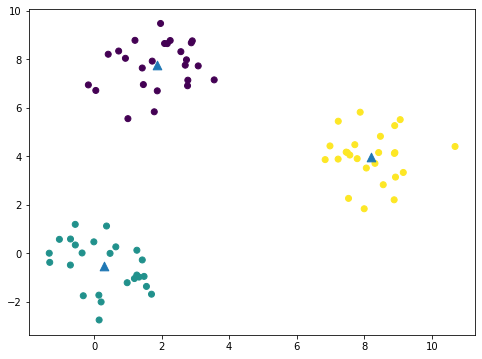

In [68]:
plt.scatter(example_1["x-coordinate"], example_1["y-coordinate"], c = model_example_1.labels_)

plt.scatter(model_example_1.cluster_centers_[:,0], model_example_1.cluster_centers_[:,1], s=75, marker = "^");

#### Question 1.2

We can specify the guesses for the centers at the start of the k-means algorithm with the argument `init`. Set `initial_guess` to the array 

```python
[[0, 1], [1, 1], [2, 2]]
```

In [69]:
initial_guess = ...
# YOUR CODE HERE
guessList = [[0, 1], [1, 1], [2, 2]]
initial_guess = pd.DataFrame(guessList)

# YOUR CODE HERE
#raise NotImplementedError()

In [70]:
# TEST 

assert initial_guess.shape == (3,2)


Now we can fit another model to the data.

In [71]:
number_clusters = 3
seed = 42
model_example_1 = cluster.KMeans(n_clusters=number_clusters, random_state=seed, init=initial_guess)
model_example_1.fit(example_1)

KMeans(init=   0  1
0  0  1
1  1  1
2  2  2, n_clusters=3, random_state=42)

We obtain different clusters.

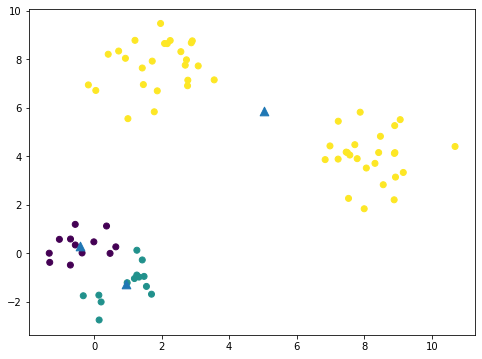

In [72]:
plt.scatter(example_1["x-coordinate"], example_1["y-coordinate"], c = model_example_1.labels_)

plt.scatter(model_example_1.cluster_centers_[:,0], model_example_1.cluster_centers_[:,1], s = 75, marker = "^");

### Question 2

We can try to make random guesses for the centers at the start of the k-means algorithm. However for some datasets, the random guesses will not avoid the trouble from Question 1.2.

#### Question 2.1

We have a dataset containing 500 points with two coordinates.

In [73]:
example_2 = pd.read_csv("example_2.csv")
example_2

,x-coordinate,y-coordinate
0,-0.351594,-0.245141
1,-0.160907,-0.877539
2,0.103332,-1.005632
3,-0.278625,0.168609
...,...,...
496,13.333539,10.517251
497,5.250177,14.961657
498,12.253756,9.216661
499,8.806881,7.966260


We can use k-means with 2 clusters.

In [74]:
number_clusters = 2
seed = 42
model_example_2 = cluster.KMeans(n_clusters=number_clusters, random_state=seed)
model_example_2.fit(example_2)

KMeans(n_clusters=2, random_state=42)

We have two labels `0` and `1`. Count the number of points in cluster `0` and cluster `1`. 

In [75]:
count_cluster_0 = ...
count_cluster_1 = ...

# YOUR CODE HERE
labels = model_example_2.labels_
zeroCount = oneCount =0
for i in labels:
  if i==0:
    zeroCount= zeroCount + 1
  else:
    oneCount = oneCount + 1
count_cluster_0 = zeroCount
count_cluster_1 = oneCount
#raise NotImplementedError()

In [76]:
print(count_cluster_0, "   ", count_cluster_1)

455     45


In [77]:
# TEST 

assert 45 in {count_cluster_0, count_cluster_1}


Note that the k-means algorithm cannot determine the two clusters.

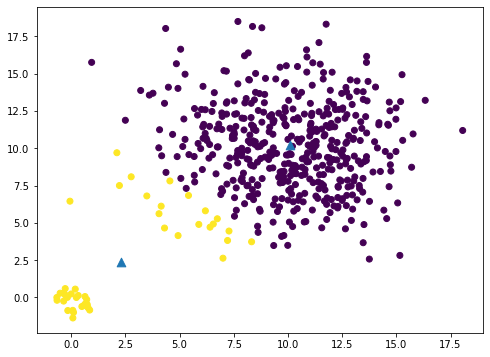

In [78]:
plt.scatter(example_2["x-coordinate"], example_2["y-coordinate"], c = model_example_2.labels_)

plt.scatter(model_example_2.cluster_centers_[:,0], model_example_2.cluster_centers_[:,1], s = 75, marker = "^");

Remember that the k-means algorithm attempts to minimize distance of a cluster from its center. Here we can reduce the distance of the large cluster from its center through the exclusion of some point. The exclude points are grouped with the small cluster. 

#### Question 2.2

We can use another approach to clustering the points. We will try the agglomerative algorithm that combines small clusters to form large clusters. 

In [79]:
number_clusters = 2
linkage = 'complete'
model_example_2_complete = cluster.AgglomerativeClustering(n_clusters=2, linkage=linkage)
model_example_2_complete.fit(example_2)

AgglomerativeClustering(linkage='complete')

We did not need to use `random_state` because the agglomerative algorithm does not need random guesses. However we need to measure the distance between clusters for the algorithm. 

We have different ways to measure distance between clusters. Here we set `linkage` to `complete` meaning the distance between two clusters is the maximum distance between a point in the first cluster and a point in the second cluster.

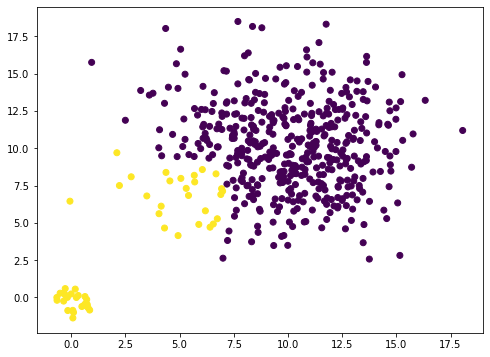

In [80]:
plt.scatter(example_2["x-coordinate"], example_2["y-coordinate"], c = model_example_2_complete.labels_);

Note that we have the same trouble from Question 2.1. 

#### Question 2.3

We can fix the trouble from Question 2.2 with a different measure of distance between clusters. Average linkage takes the distance between two clusters as the average distance between a point in the first cluster and a point in the second cluster. Change from `complete` to `average` for the `linkage` argument.

In [81]:
linkage = ...
linkage = 'average'

# YOUR CODE HERE
#raise NotImplementedError()

number_clusters = 2
model_example_2_average = cluster.AgglomerativeClustering(n_clusters=2, linkage=linkage)
model_example_2_average.fit(example_2)

AgglomerativeClustering(linkage='average')

In [82]:
# TEST 

assert model_example_2_average.linkage == "average"

We have corrected the issue.

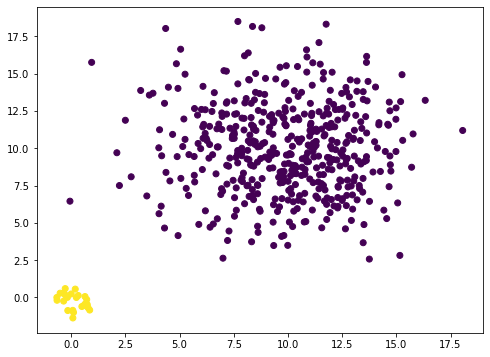

In [83]:
plt.scatter(example_2["x-coordinate"], example_2["y-coordinate"], c = model_example_2_average.labels_);

### Question 3

Sometimes we need to try different guesses for the number of clusters. We can use the silhouette metric to compare the clusterings.

#### Question 3.1

We have a dataset containing 300 points with two coordinates.

In [84]:
example_3 = pd.read_csv("example_3.csv")
example_3

,x-coordinate,y-coordinate
0,-3.346682,-1.406375
1,-4.241028,-0.643629
2,-4.422179,0.413329
3,-2.761552,-1.114501
...,...,...
296,2.414842,5.867081
297,1.635563,5.482199
298,-0.429633,6.438451
299,2.201867,5.363289


Generate three different models for the k-means algorithm with `random_state` 42 and 

- `n_clusters = 2`
- `n_clusters = 3`
- `n_clusters = 4`

Fit the models to the data in `example_3`.

In [96]:
random_state=42

model_example_3_2_clusters = ...
model_example_3_3_clusters = ...
model_example_3_4_clusters = ...


model_example_3_2_clusters = cluster.KMeans(n_clusters=2, random_state = random_state)
model_example_3_2_clusters.fit(example_3)
model_example_3_3_clusters = cluster.KMeans(n_clusters=3, random_state = random_state)
model_example_3_3_clusters.fit(example_3)
model_example_3_4_clusters = cluster.KMeans(n_clusters=4, random_state = random_state)
model_example_3_4_clusters.fit(example_3)

# YOUR CODE HERE
#raise NotImplementedError()

KMeans(n_clusters=4, random_state=42)

In [87]:
# TEST 

assert model_example_3_2_clusters.n_clusters == 2
assert model_example_3_3_clusters.n_clusters == 3
assert model_example_3_4_clusters.n_clusters == 4


In [189]:
import pandas as pd

# k means using 5 clusters and k-means++ initialization
kmeans = cluster.KMeans(n_clusters = 5, random_state=42)
kmeans.fit(example_3)
pred = kmeans.predict(X=example_3, sample_weight=None)
print(pred)

# frame = pd.DataFrame(example_3)
# frame['cluster'] = pred
# cluster_points = frame['cluster'].value_counts()
# m = dict(cluster_points)
# print(m)
# Cluster = 0
# maximum = -1
# for pts, val in m.items():
#     if val>maximum :
#         maximum = val
#         Clusture = pts
# print(Clusture)

[3 3 0 3 0 0 3 0 3 0 3 3 0 0 3 0 0 0 0 3 0 3 0 0 0 3 3 3 0 0 0 3 0 3 0 3 3
 3 0 0 0 0 3 3 0 3 0 0 3 3 3 3 0 0 0 0 0 0 3 3 0 0 3 3 3 0 3 0 0 0 3 3 2 0
 3 0 0 3 3 3 0 0 3 0 0 3 0 3 3 0 0 0 0 3 3 0 0 0 3 0 1 4 4 4 4 4 4 4 1 1 4
 4 4 1 4 1 1 4 4 1 4 1 1 4 4 1 4 4 4 1 4 4 4 4 1 1 1 4 4 4 1 1 1 4 1 1 4 1
 4 1 1 1 1 4 1 4 1 4 4 4 1 4 4 1 4 4 1 1 4 4 4 1 4 1 4 1 4 4 1 4 1 1 4 4 4
 1 4 4 4 4 4 1 4 4 4 4 1 4 4 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


#### Question 3.2

We can generate scatter-plots to assess the clustering.

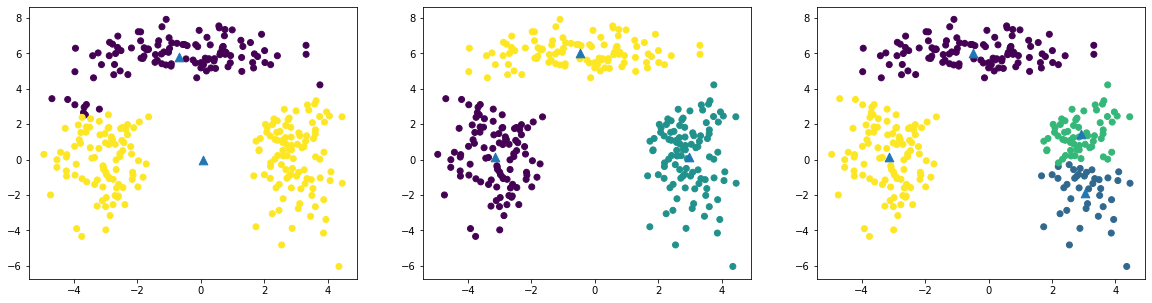

In [157]:
models = [model_example_3_2_clusters, model_example_3_3_clusters, model_example_3_4_clusters]

fig, axes = plt.subplots(1,3,figsize = (20,5))
for model, ax in zip(models, axes.flatten()):
    ax.scatter(example_3["x-coordinate"], example_3["y-coordinate"], c = model.labels_)
    ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 75, marker = "^");

Based on the following scatter-plots, how many clusters should we use for the k-means algorithm?

1. 2
1. 3
1. 4

In [163]:
q3_2 = ...


kmeans = cluster.KMeans(n_clusters = 5, random_state=42)
kmeans.fit(example_3)
pred = kmeans.predict(X=example_3, sample_weight=None)


frame = pd.DataFrame(example_3)
frame['cluster'] = pred
cluster_points = frame['cluster'].value_counts()
m = dict(cluster_points)
print(m)
Cluster = 0
maximum = -1
for pts, val in m.items():
    if val>maximum :
        maximum = val
        Clusture = pts
print(Clusture)
q3_2 = Clusture
# YOUR CODE HERE
# raise NotImplementedError()

{4: 101, 1: 60, 0: 55, 2: 44, 3: 40}
4


In [164]:
# TEST 

assert q3_2 in [2,3,4]


#### Question 3.3

If the points had more coordinates, then we would have trouble assessing the clustering through charts. Instead we need to calculate a metric to compare 2, 3 or 4 clusters. 

We will use the silhouette metric which computes a ratio reflecting the average distance within a cluster to the average distance to the nearest cluster. 

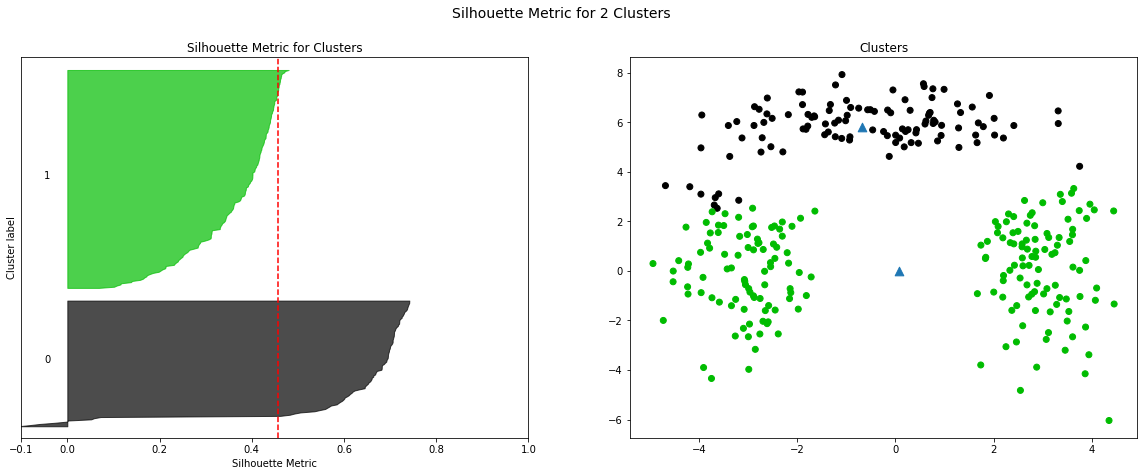

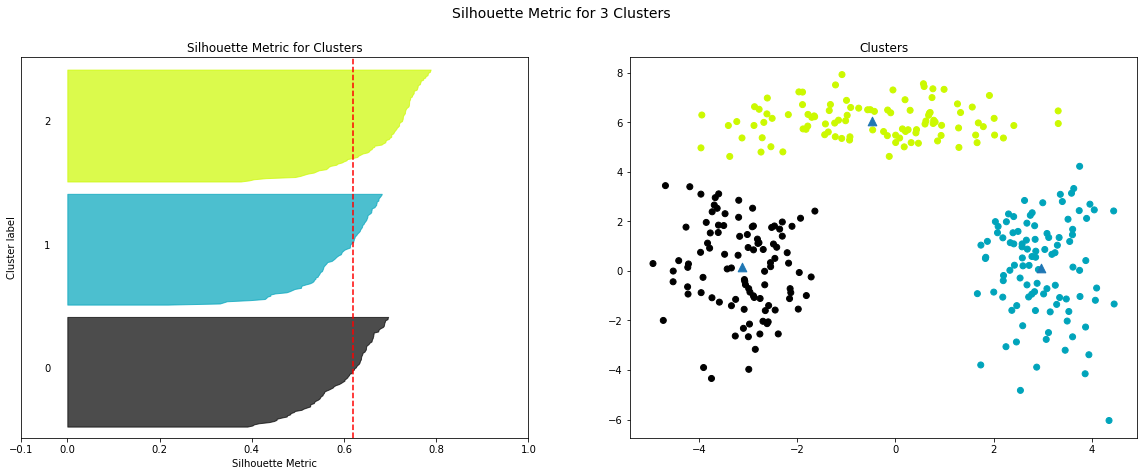

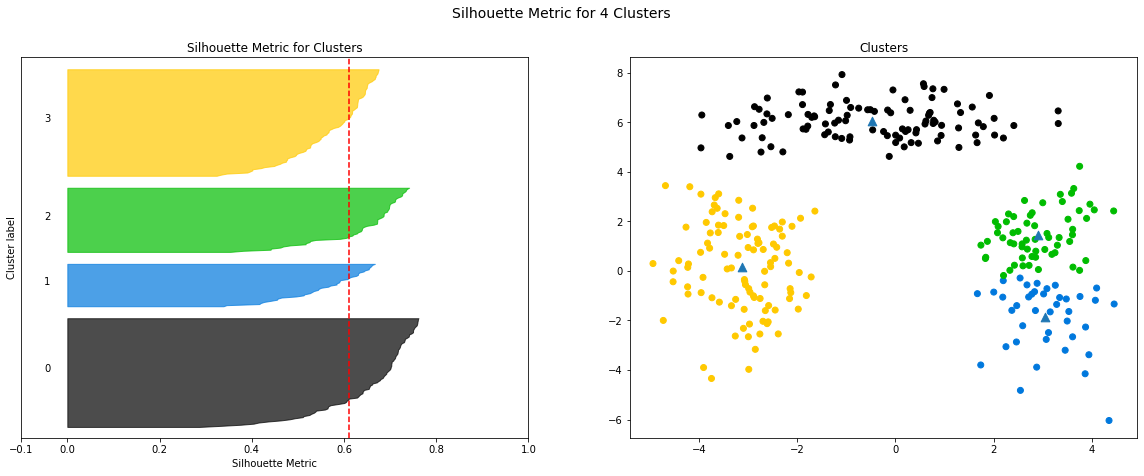

In [165]:
helper_functions.plot_silhouette(example_3, models)

Based on the following silhouette metrics, how many clusters should we use for the k-means algorithm?

1. 2
1. 3
1. 4

In [182]:
from sklearn import datasets
from sklearn.cluster import KMeans
#
# Instantiate the KMeans models
#
clusters_list = [2,3,4]
cnt_cluster = 1
maximum = -1
for i in clusters_list:
    km = KMeans(n_clusters=i, random_state=42)
    # Fit the KMeans model
    km.fit_predict(example_3)
    # Calculate Silhoutte Score
    score = silhouette_score(example_3, km.labels_, metric='euclidean')
    if score > maximum:
        maximum = score
        cnt_cluster = i
    print('Silhouetter Score: %.3f' % score)
print(cnt_cluster)


Silhouetter Score: 0.476
Silhouetter Score: 0.619
Silhouetter Score: 0.610
3


ValueError: Found input variables with inconsistent numbers of samples: [300, 3]

In [183]:
q3_3 = ...

# YOUR CODE HERE
from sklearn import datasets
from sklearn.cluster import KMeans
#
# Instantiate the KMeans models
#
clusters_list = [2,3,4]
cnt_cluster = 1
maximum = -1
for i in clusters_list:
    km = KMeans(n_clusters=i, random_state=42)
    #
    # Fit the KMeans model
    #
    km.fit_predict(example_3)
    #
    # Calculate Silhoutte Score
    #
    score = silhouette_score(example_3, km.labels_, metric='euclidean')
    #
    # Print the score
    #
    if score > maximum:
        maximum = score
        cnt_cluster = i
    print('Silhouetter Score: %.3f' % score)
print(cnt_cluster)
q3_3 = cnt_cluster
#raise NotImplementedError()

Silhouetter Score: 0.476
Silhouetter Score: 0.619
Silhouetter Score: 0.610
3


In [184]:
# TEST 

assert q3_3 in [2,3,4]


### Question 4

Having studied three small datasets, we will study a large dataset with more than two coordinates. 

In [190]:
world_bank_data = pd.read_csv(path_data)
world_bank_data = world_bank_data.set_index("country")
world_bank_data

,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Bird species, threatened",...,"Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
country,,,,,,,,,
Algeria,57.508032,10.021442,47.486590,15.0,...,26.762000,73.734001,68.160004,69.056000
Afghanistan,84.077656,4.758273,79.319383,16.0,...,89.378998,4.282000,13.292000,10.108000
Albania,45.810037,20.041214,25.768823,8.0,...,54.854000,44.320999,41.542999,42.720001
American Samoa,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,72.653903,5.409757,67.244146,15.0,...,22.934000,73.959000,69.902000,70.501999
"Yemen, Rep.",73.886314,5.001439,68.884875,16.0,...,45.397998,31.586000,48.567001,47.410999
Zambia,88.806844,3.964332,84.842512,20.0,...,77.780998,11.976000,31.136999,21.917999
Zimbabwe,82.951116,5.377887,77.573229,19.0,...,65.651999,24.141001,43.176998,33.872002


We have some missing values. We will fill them with 0.

In [191]:
world_bank_data = world_bank_data.fillna(0)

#### Question 4.1

Generate a model for the k-means algorithm called `world_bank_model_1` with 

- `n_clusters = 4`
- `random_state = 42`

In [193]:
world_bank_model_1 = ...
n_clusters = 4
random_state = 42
world_bank_model_1 = cluster.KMeans(n_clusters=n_clusters, random_state=random_state)

# YOUR CODE HERE
#raise NotImplementedError()

We can fit the model to the data.

In [194]:
world_bank_model_1.fit(world_bank_data) 

KMeans(n_clusters=4, random_state=42)

In [195]:
# TEST 

distinct, counts = np.unique(world_bank_model_1.labels_, return_counts= True)
assert 199 in counts


We hav 199 of 217 countries in a cluster. The countries in the other three clusters appear to have some relation to each other.

In [196]:
labeled_world_bank_data = world_bank_data.copy()
labeled_world_bank_data['cluster'] = world_bank_model_1.labels_

print(labeled_world_bank_data[labeled_world_bank_data["cluster"] == distinct[counts == 2][0]].index.to_list())
print(labeled_world_bank_data[labeled_world_bank_data["cluster"] == distinct[counts == 3][0]].index.to_list())
print(labeled_world_bank_data[labeled_world_bank_data["cluster"] == distinct[counts == 13][0]].index.to_list())

['China', 'United States']
['Germany', 'India', 'Japan']
['Australia', 'Brazil', 'Canada', 'France', 'Indonesia', 'Italy', 'Korea, Rep.', 'Mexico', 'Russian Federation', 'Saudi Arabia', 'Spain', 'Turkey', 'United Kingdom']


#### Question 4.2

We have different scales among the numbers in the dataset. Large countries have large numbers and small countries have small numbers. The skew in the numbers impacts the calculation of distances for the k-means algorithm. If we apply a data transformation, then we can avoid the issue.

In [197]:
world_bank_data_centered_and_scaled = world_bank_data.copy()
world_bank_data_centered_and_scaled = world_bank_data_centered_and_scaled - np.mean(world_bank_data_centered_and_scaled, axis = 0)

We have made a copy of `world_bank`. For each column, we have subtracted the average value of the column. 

In [198]:
world_bank_data_centered_and_scaled.sum(axis = 0)

Age dependency ratio (% of working-age population)                                   7.119638e-12
Age dependency ratio, old (% of working-age population)                              3.463896e-14
Age dependency ratio, young (% of working-age population)                            2.771117e-12
Bird species, threatened                                                             1.030287e-13
                                                                                         ...     
Vulnerable employment, total (% of total employment) (modeled ILO estimate)          6.963319e-13
Wage and salaried workers, female (% of female employment) (modeled ILO estimate)   -3.730349e-13
Wage and salaried workers, male (% of male employment) (modeled ILO estimate)       -5.009326e-13
Wage and salaried workers, total (% of total employment) (modeled ILO estimate)     -1.669775e-13
Length: 209, dtype: float64

In [202]:
world_bank_data_centered_and_scaled
for i in world_bank_data_centered_and_scaled.rows:
    i

,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Bird species, threatened",...,"Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
country,,,,,,,,,
Algeria,5.317933,-2.186296,7.504229,-6.423963,...,-5.524737,23.480568,16.406091,17.964967
Afghanistan,31.887557,-7.449465,39.337022,-5.423963,...,57.092260,-45.971433,-38.461913,-40.983033
Albania,-6.380062,7.833476,-14.213538,-13.423963,...,22.567263,-5.932434,-10.210913,-8.371031
American Samoa,-52.190099,-12.207738,-39.982361,-13.423963,...,-32.286737,-50.253433,-51.753913,-51.091032
...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,20.463804,-6.797981,27.261785,-6.423963,...,-9.352737,23.705567,18.148088,19.410966
"Yemen, Rep.",21.696214,-7.206299,28.902514,-5.423963,...,13.111261,-18.667433,-3.186911,-3.680033
Zambia,36.616745,-8.243406,44.860151,-1.423963,...,45.494261,-38.277433,-20.616913,-29.173033
Zimbabwe,30.761017,-6.829851,37.590868,-2.423963,...,33.365261,-26.112432,-8.576914,-17.219031


For each column, divide by the standard deviation. 

In [ ]:
# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
# TEST
assert np.all(abs(world_bank_data_centered_and_scaled.std(axis = 0) - 1) < 0.1) 

We can fitted a model to the transformed data.

In [ ]:
world_bank_model_2 = cluster.KMeans(n_clusters=4, random_state=42).fit(world_bank_data_centered_and_scaled) 

We can interpret the four clusters.

- 0: Countries with small population
- 1: More industrial countries
- 2: Less industrial countries
- 3: Countries with large population

In [ ]:
labeled_world_bank_data = world_bank_data.copy()
labeled_world_bank_data['cluster'] = world_bank_model_2.labels_

print(labeled_world_bank_data[labeled_world_bank_data["cluster"] == 0].index.to_list())
print(labeled_world_bank_data[labeled_world_bank_data["cluster"] == 1].index.to_list())